### **CHALLENGE - ALURA**

---



Descrição do Desafio: Durante este desafio, iremos ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. Para isso, analisararemos dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store. O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

IMPORTANDO A BIBLIOTECA PANDAS, MATPLOTLIB E SEABORN E SALVANDO OS DADOS EM VARIÁVEIS

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

SALVANDO AS BASES DE DADOS NAS RESPECTIVAS VARIÁVEIS

In [121]:
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

ANALISANDO AS COLUNAS, QTDES DE REGISTROS, TIPOS DE DADOS E SE AS COLUNAS CONTÉM VALORES NULOS

In [122]:
loja1.info()
loja2.info()
loja3.info()
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

CATEGORIAS MAIS VENDIDAS

In [123]:
#Quais categorias de produtos mais vendem em cada loja!

qtd_loja1 = loja1[['Categoria do Produto']].value_counts()
qtd_loja2 = loja2[['Categoria do Produto']].value_counts()
qtd_loja3 = loja3[['Categoria do Produto']].value_counts()
qtd_loja4 = loja4[['Categoria do Produto']].value_counts()


qtd_loja1 = pd.DataFrame(loja1['Categoria do Produto'].value_counts())
qtd_loja1.columns = ['Loja 1 (Qtde de Vendas)']
qtd_loja2 = pd.DataFrame(loja2['Categoria do Produto'].value_counts())
qtd_loja2.columns = ['Loja 2 (Qtde de Vendas)']
qtd_loja3 = pd.DataFrame(loja3['Categoria do Produto'].value_counts())
qtd_loja3.columns = ['Loja 3 (Qtde de Vendas)']
qtd_loja4 = pd.DataFrame(loja4['Categoria do Produto'].value_counts())
qtd_loja4.columns = ['Loja 4 (Qtde de Vendas)']


qtd_lojas = pd.concat([qtd_loja1, qtd_loja2, qtd_loja3, qtd_loja4], axis=1)

# Adiciona a coluna 'Somatório de Todas_lojas' com o somatório das vendas de todas as lojas
qtd_lojas['Soma de Todas_lojas'] = qtd_lojas.sum(axis=1)

qtd_lojas



,Loja 1 (Qtde de Vendas),Loja 2 (Qtde de Vendas),Loja 3 (Qtde de Vendas),Loja 4 (Qtde de Vendas),Soma de Todas_lojas
Categoria do Produto,,,,,
moveis,465,442,499,480,1886
eletronicos,448,422,451,451,1772
brinquedos,324,313,315,338,1290
eletrodomesticos,312,305,278,254,1149
esporte e lazer,284,275,277,277,1113
instrumentos musicais,182,224,177,170,753
livros,173,197,185,187,742
utilidades domesticas,171,181,177,201,730


In [124]:
# Adiciona uma coluna 'Filial' a cada DataFrame para identificação
# Usamos .copy() para evitar modificar os dataframes originais
loja1_df = loja1.copy()
loja2_df = loja2.copy()
loja3_df = loja3.copy()
loja4_df = loja4.copy()

loja1_df['Filial'] = 'loja1'
loja2_df['Filial'] = 'loja2'
loja3_df['Filial'] = 'loja3'
loja4_df['Filial'] = 'loja4'

# Combina todos os DataFrames em um único
df_total = pd.concat([loja1_df, loja2_df, loja3_df, loja4_df], ignore_index=True)


FATURAMENTO POR LOJA

In [125]:
# Faturamento total por filial
faturamento_por_filial = df_total.groupby('Filial')['Preço'].sum().sort_values(ascending=False)
print("Faturamento por Filial:")
print(faturamento_por_filial)


#Faturamento por Filial:
#loja1 =   1534509.12      TEVE MAIOR FATURAMENTO QUE AS OUTRAS LOJAS
#loja2 =   1488459.06
#loja3 =   1464025.03
#loja4 =   1384497.58      TEVE MENOR FATURAMENTO QUE AS OUTRAS LOJAS



Faturamento por Filial:
Filial
loja1    1534509.12
loja2    1488459.06
loja3    1464025.03
loja4    1384497.58
Name: Preço, dtype: float64


FATURAMENTO TOTAL POR LOJA

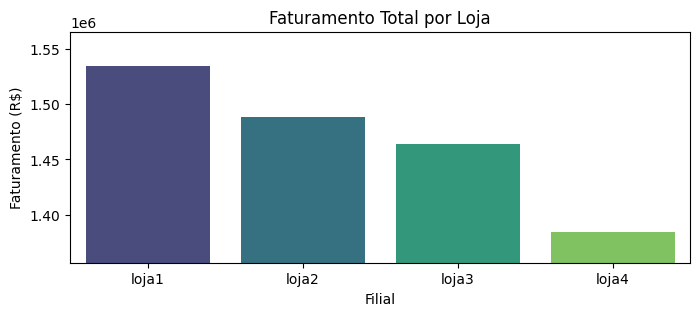

In [126]:
# Gráfico 1: Faturamento por Filial (Barras)
plt.figure(figsize=(8, 3))
sns.barplot(x=faturamento_por_filial.index, y=faturamento_por_filial.values, hue=faturamento_por_filial.index, palette='viridis', legend=False)
plt.title('Faturamento Total por Loja')
plt.xlabel('Filial')
plt.ylabel('Faturamento (R$)')


# Ajusta os limites do eixo Y para focar na variação dos dados
min_val = faturamento_por_filial.min() * 0.98 # Um pouco abaixo do mínimo
max_val = faturamento_por_filial.max() * 1.02 # Um pouco acima do máximo
plt.ylim(min_val, max_val)


plt.show()

TOP 5 CATEGORIAS MAIS VENDIDA (FATURAMENTO TODAS AS LOJAS)

In [127]:
# Top 5 Categorias mais vendidas no geral (Faturamento)
categoria_mais_vendida = df_total.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Categorias Mais Vendidas (Faturamento):")
print(categoria_mais_vendida)

#As 5 Categorias mais vendidas no geral (em faturamento) foram:
#eletronicos              2214099.72
#eletrodomesticos         1766337.03
#moveis                   1010214.00
#instrumentos musicais     465029.67
#esporte e lazer           190635.39



Top 5 Categorias Mais Vendidas (Faturamento):
Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
Name: Preço, dtype: float64


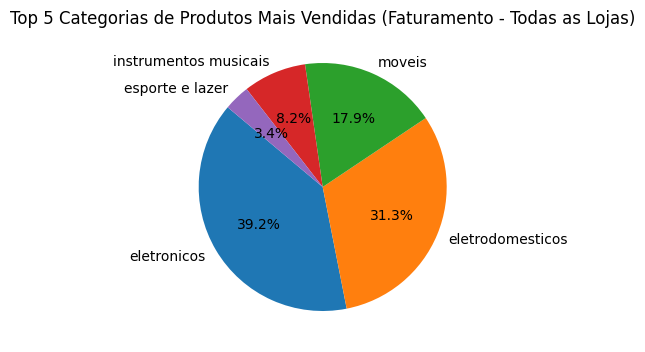

In [128]:
# Gráfico 2: Top 5 Categorias mais vendidas (Todas as lojas - Gráfico de Pizza)
plt.figure(figsize=(4, 8))
plt.pie(categoria_mais_vendida, labels=categoria_mais_vendida.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Categorias de Produtos Mais Vendidas (Faturamento - Todas as Lojas)')
plt.show()

AS 3 CATEGORIAS MENOS VENDIDAS NO GERAL (FATURAMENTO)

In [129]:
# As 3 Categorias menos vendidas no geral (em faturamento)
categoria_menos_vendida = df_total.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False).tail(3)
print("\nAs 3 Categorias menos Vendidas (Faturamento):")
print(categoria_menos_vendida)

#As 3 Categorias menos Vendidas (Faturamento):
#Categoria do Produto
#brinquedos               98140.86
#utilidades domesticas    76773.38
#livros                   50260.74

# Faturamento de cada loja por categoria do Produto
x = df_total.groupby(["Filial","Categoria do Produto"])["Preço"].sum().groupby(level=0, group_keys=False).nlargest(9)
x



As 3 Categorias menos Vendidas (Faturamento):
Categoria do Produto
brinquedos               98140.86
utilidades domesticas    76773.38
livros                   50260.74
Name: Preço, dtype: float64


Filial  Categoria do Produto 
loja1   eletronicos              572659.23
        eletrodomesticos         484913.36
        moveis                   250178.11
        instrumentos musicais    121731.69
        esporte e lazer           52387.55
        brinquedos                23993.78
        utilidades domesticas     16931.48
        livros                    11713.92
loja2   eletronicos              547773.71
        eletrodomesticos         464758.13
        moveis                   235234.68
        instrumentos musicais    139987.03
        esporte e lazer           46326.09
        brinquedos                21262.21
        utilidades domesticas     19662.86
        livros                    13454.35
loja3   eletronicos              547699.92
        eletrodomesticos         438984.89
        moveis                   268095.56
        instrumentos musicais    103174.45
        esporte e lazer           47456.10
        brinquedos                25869.20
        utilidades domesticas     20080.21
        livros                    12664.70
loja4   eletronicos              545966.86
        eletrodomesticos         377680.65
        moveis                   256705.65
        instrumentos musicais    100136.50
        esporte e lazer           44465.65
        brinquedos                27015.67
        utilidades domesticas     20098.83
        livros                    12427.77
Name: Preço, dtype: float64

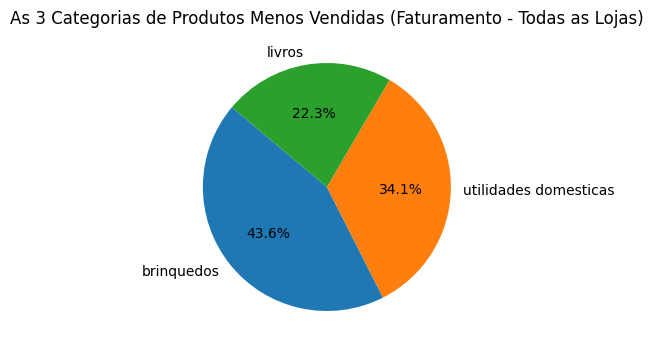

In [130]:
# Gráfico 3: As 3 Categorias menos vendidas (Todas as lojas - Gráfico de Pizza)
plt.figure(figsize=(4, 8))
plt.pie(categoria_menos_vendida, labels=categoria_menos_vendida.index, autopct='%1.1f%%', startangle=140)
plt.title('As 3 Categorias de Produtos Menos Vendidas (Faturamento - Todas as Lojas)')
plt.show()

MÉDIA DE AVALIAÇÃO POR LOJA

In [131]:
# Média de avaliação por filial
media_avaliacao_filial = df_total.groupby('Filial')['Avaliação da compra'].mean()
print("\nMédia de Avaliação por Filial:")
print(media_avaliacao_filial)


#Média de Avaliação por Filial:
#loja1 =   3.976685       TEVE A MENOR AVALIAÇÃO MÉDIA ENTRE TODAS AS LOJAS
#loja2 =   4.037304
#loja3 =   4.048326       TEVE A MAIOR AVALIAÇÃO MÉDIA ENTRE TODAS AS LOJAS
#loja4 =   3.995759


Média de Avaliação por Filial:
Filial
loja1    3.976685
loja2    4.037304
loja3    4.048326
loja4    3.995759
Name: Avaliação da compra, dtype: float64


GRÁFICO DA MÉDIA DE AVALIAÇÃO POR LOJA

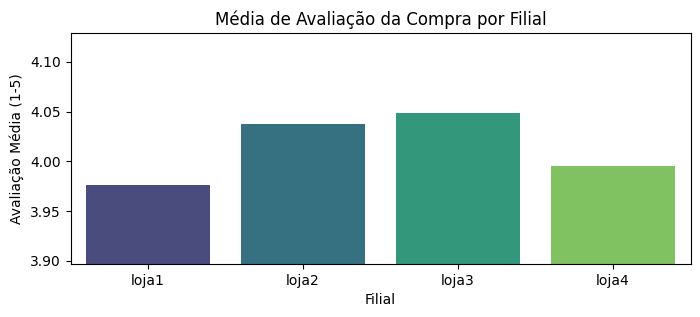

In [132]:
# Gráfico 4: Média de Avaliação por Filial (Barras)
plt.figure(figsize=(8, 3))
sns.barplot(x=media_avaliacao_filial.index, y=media_avaliacao_filial.values, hue=media_avaliacao_filial.index, palette='viridis', legend=False)
plt.title('Média de Avaliação da Compra por Filial')
plt.xlabel('Filial')
plt.ylabel('Avaliação Média (1-5)')

# Ajusta os limites do eixo Y para focar na variação dos dados
min_val = media_avaliacao_filial.min() * 0.98 # Um pouco abaixo do mínimo
max_val = media_avaliacao_filial.max() * 1.02 # Um pouco acima do máximo
plt.ylim(min_val, max_val)

plt.show()

FRETE MÉDIO POR LOJA

In [133]:
#Frete médio
frete_medio = df_total.groupby('Filial')['Frete'].mean()
print("\nFrete Médio por Filial:")
print(frete_medio)


#Frete Médio por Filial:
#loja1 =   34.691805        TEVE O MAIOR FRETE MÉDIO ENTRE TODAS AS LOJAS
#loja2 =   33.621941
#loja3 =   33.074464
#loja4 =   31.278997        TEVE O MENOR FRETE MÉDIO ENTRE TODAS AS LOJAS




Frete Médio por Filial:
Filial
loja1    34.691805
loja2    33.621941
loja3    33.074464
loja4    31.278997
Name: Frete, dtype: float64


In [134]:
# Monta tabela resumo
resumo = pd.DataFrame({
    "Faturamento": faturamento_por_filial,
    "Avaliação média": media_avaliacao_filial,
    "Frete médio": frete_medio
}).reset_index().rename(columns={"index":"Filial"})

# Top produtos por loja
top_produtos = df_total.groupby(["Filial","Produto"])["Preço"].sum().groupby(level=0, group_keys=False).nlargest(5)

# Tabela: Top 5 produtos por loja (exibir)
top_produtos_df = top_produtos.reset_index().rename(columns={0:"Receita_Total"})
print("Top 5 produtos por loja (Receita):")
print(top_produtos_df.to_markdown(index=False))

# Preparar recomendação:
score = ( (resumo["Faturamento"].max() - resumo["Faturamento"]) / resumo["Faturamento"].max() ) \
        + ( (resumo["Avaliação média"].max() - resumo["Avaliação média"]) / resumo["Avaliação média"].max() ) \
        + ( resumo["Frete médio"] / resumo["Frete médio"].max() )

resumo["Score_ruim"] = score.round(3)
resumo = resumo.sort_values("Score_ruim", ascending=False)


print('================'*5)
print("Resumo com score (obs: Quanto mais alto = pior desempenho relativo):")
print('================'*5)
print(resumo.to_markdown(index=False))

# Salva análise em CSV
output_dir = "/alura/data/alura_store"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

resumo.to_csv(os.path.join(output_dir, "resumo_lojas.csv"), index=False)
top_produtos_df.to_csv(os.path.join(output_dir, "top_produtos_lojas.csv"), index=False)

print('================'*5)
print(f"Arquivos CSV gerados em {output_dir}/ (resumo_lojas.csv, top_produtos_lojas.csv)")

Top 5 produtos por loja (Receita):
| Filial   | Produto            |    Preço |
|:---------|:-------------------|---------:|
| loja1    | TV Led UHD 4K      | 189534   |
| loja1    | Geladeira          | 149524   |
| loja1    | Celular Plus X42   | 130536   |
| loja1    | Smart TV           |  89936.1 |
| loja1    | Lavadora de roupas |  87711.3 |
| loja2    | Celular Plus X42   | 150968   |
| loja2    | TV Led UHD 4K      | 137833   |
| loja2    | Geladeira          | 130176   |
| loja2    | Lavadora de roupas |  89016.8 |
| loja2    | Smart TV           |  81522.9 |
| loja3    | Geladeira          | 133186   |
| loja3    | TV Led UHD 4K      | 128892   |
| loja3    | Celular Plus X42   | 124301   |
| loja3    | Smart TV           | 105116   |
| loja3    | Lava louças        |  85819.7 |
| loja4    | Celular Plus X42   | 128930   |
| loja4    | TV Led UHD 4K      | 120393   |
| loja4    | Smart TV           | 110388   |
| loja4    | Geladeira          | 100363   |
| loja4    | Tablet 

GRÁFICO DISPERSÃO (FATURAMENTO X AVALIAÇÃO MÉDIA)

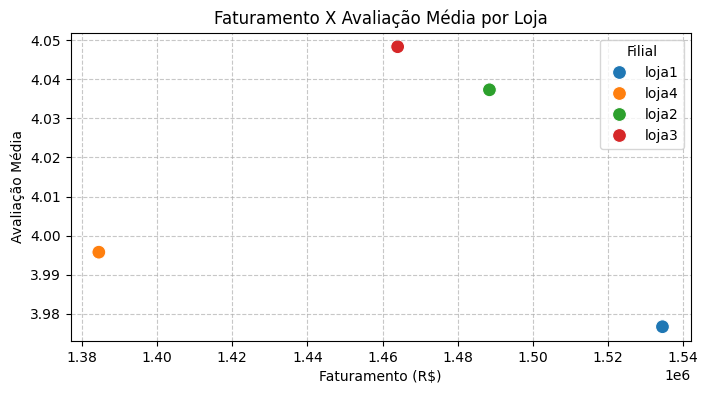

In [135]:
#Gráfico 5: Faturamento x Avaliação Média
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Faturamento', y='Avaliação média', hue='Filial', data=resumo, s=100)
plt.title('Faturamento X Avaliação Média por Loja')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Avaliação Média')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()